In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pnevmoniya/sample_solution.csv
/kaggle/input/pnevmoniya/test/test_img_10340.jpeg
/kaggle/input/pnevmoniya/test/test_img_10168.jpeg
/kaggle/input/pnevmoniya/test/test_img_10613.jpeg
/kaggle/input/pnevmoniya/test/test_img_10368.jpeg
/kaggle/input/pnevmoniya/test/test_img_10036.jpeg
/kaggle/input/pnevmoniya/test/test_img_10527.jpeg
/kaggle/input/pnevmoniya/test/test_img_10020.jpeg
/kaggle/input/pnevmoniya/test/test_img_10585.jpeg
/kaggle/input/pnevmoniya/test/test_img_10276.jpeg
/kaggle/input/pnevmoniya/test/test_img_10054.jpeg
/kaggle/input/pnevmoniya/test/test_img_10298.jpeg
/kaggle/input/pnevmoniya/test/test_img_10355.jpeg
/kaggle/input/pnevmoniya/test/test_img_10511.jpeg
/kaggle/input/pnevmoniya/test/test_img_10410.jpeg
/kaggle/input/pnevmoniya/test/test_img_10096.jpeg
/kaggle/input/pnevmoniya/test/test_img_10219.jpeg
/kaggle/input/pnevmoniya/test/test_img_10057.jpeg
/kaggle/input/pnevmoniya/test/test_img_10296.jpeg
/kaggle/input/pnevmoniya/test/test_img_10407.jpeg
/kagg

In [20]:
from ipywidgets import  widgets
from fastai.vision.all import *

path = Path('/kaggle/input/pnevmoniya/train')
fls = get_image_files(path)
fls

(#5216) [Path('/kaggle/input/pnevmoniya/train/PNEUMONIA/person1180_virus_2010.jpeg'),Path('/kaggle/input/pnevmoniya/train/PNEUMONIA/person1230_virus_2081.jpeg'),Path('/kaggle/input/pnevmoniya/train/PNEUMONIA/person1513_virus_2632.jpeg'),Path('/kaggle/input/pnevmoniya/train/PNEUMONIA/person124_virus_238.jpeg'),Path('/kaggle/input/pnevmoniya/train/PNEUMONIA/person746_virus_1369.jpeg'),Path('/kaggle/input/pnevmoniya/train/PNEUMONIA/person588_bacteria_2422.jpeg'),Path('/kaggle/input/pnevmoniya/train/PNEUMONIA/person466_virus_960.jpeg'),Path('/kaggle/input/pnevmoniya/train/PNEUMONIA/person1590_bacteria_4175.jpeg'),Path('/kaggle/input/pnevmoniya/train/PNEUMONIA/person399_bacteria_1805.jpeg'),Path('/kaggle/input/pnevmoniya/train/PNEUMONIA/person59_bacteria_279.jpeg')...]

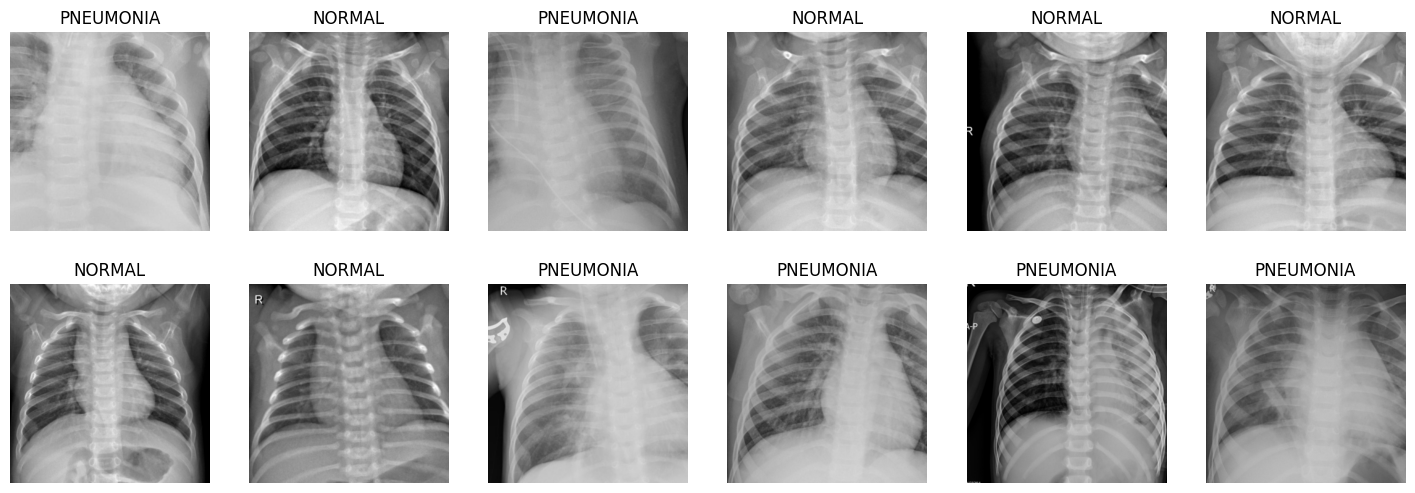

In [16]:
#Datablock yaratamiz
pnevmaniya = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.1,seed = 42),
    get_y = parent_label,
    item_tfms = Resize(324))

# Dataloader yaratamiz
dls = pnevmaniya.dataloaders(path)

#datasetni tekshirish
dls.train.show_batch(max_n=12,nrows=2)

In [24]:
learn = vision_learner(dls,resnet34, metrics = accuracy)
learn.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.456829,0.170746,0.944338,00:58


epoch,train_loss,valid_loss,accuracy,time
0,0.153839,0.067857,0.982726,01:03
1,0.085939,0.078996,0.980806,01:03
2,0.038888,0.024403,0.992322,01:03
